<a href="https://colab.research.google.com/github/mrtkp9993/DataSciencePython/blob/main/Chaospy_ode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import chaospy
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot
pyplot.rc("figure", figsize=[15, 6])

In [5]:
def ode_logistic(variables, coordinates, parameters):
    var_y = variables
    yasm, beta = parameters

    delta_y = (beta / yasm) * var_y * (yasm - var_y)

    return delta_y

In [6]:
def initial_condition(delta):
    return 3

In [27]:
yasm = chaospy.Uniform(5.0, 200.0)
beta = chaospy.Uniform(0.1, 1.5)
distribution = chaospy.J(yasm, beta)

In [28]:
parameters = chaospy.E(distribution)
parameters

array([102.5,   0.8])

In [31]:
time_span = numpy.linspace(0, 30, 1000)
responses = odeint(ode_logistic, initial_condition(delta=1e-4), time_span, args=(parameters,))

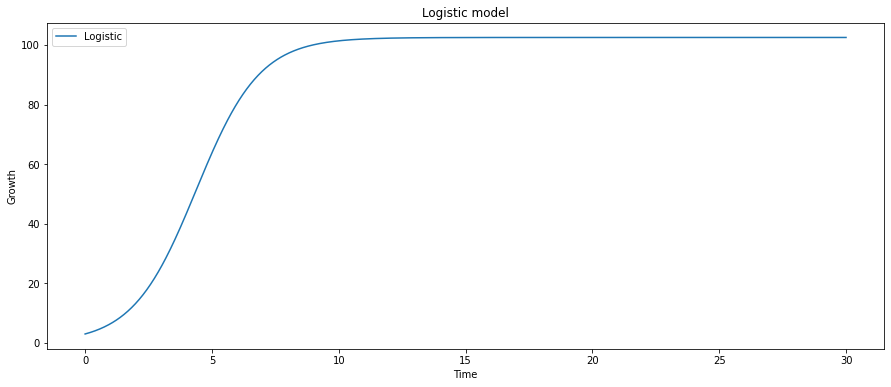

In [32]:
from matplotlib import pyplot

labels = ['Logistic']
for response, label in zip(responses.T, labels):
    pyplot.plot(time_span, response, label=label)

pyplot.title('Logistic model')
pyplot.xlabel('Time')
pyplot.ylabel('Growth')
pyplot.legend()

In [33]:
polynomial_order = 3
polynomial_expansion = chaospy.generate_expansion(polynomial_order, distribution)
polynomial_expansion[:5].round(5)

polynomial([1.0, q1-0.8, q0-102.5, q1**2-1.6*q1+0.47667,
            q0*q1-102.5*q1-0.8*q0+82.0])

In [35]:
quadrature_order = 8
abscissas, weights = chaospy.generate_quadrature(
    quadrature_order, distribution, rule="gaussian")

In [36]:
def model_solver(parameters, delta=1e-4):
    return odeint(ode_seir, initial_condition(delta), time_span, args=(parameters,))

In [37]:
from multiprocessing import Pool

with Pool(4) as pool:
    evaluations = pool.map(model_solver, abscissas.T)

In [38]:
model_approx = chaospy.fit_quadrature(
    polynomial_expansion, abscissas, weights, evaluations)

In [39]:
expected = chaospy.E(model_approx, distribution)
std = chaospy.Std(model_approx, distribution)

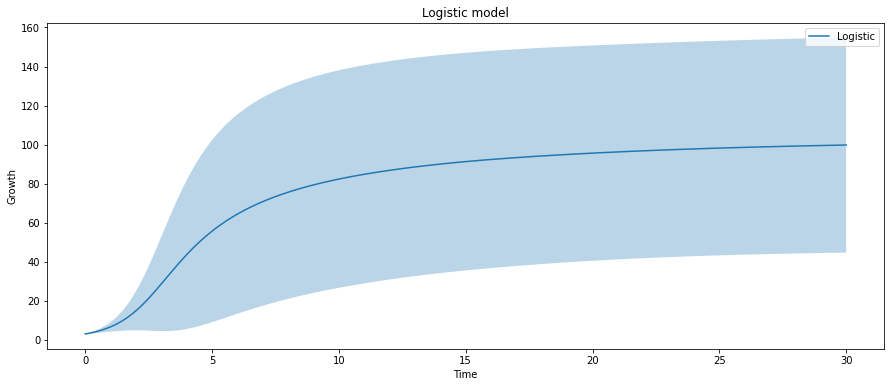

In [40]:
for mu, sigma, label in zip(expected.T, std.T, labels):
    pyplot.fill_between(
        time_span, mu-sigma, mu+sigma, alpha=0.3)
    pyplot.plot(time_span, mu, label=label)

pyplot.title('Logistic model')
pyplot.xlabel('Time')
pyplot.ylabel('Growth')
pyplot.legend()